In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# Set styles for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [50]:
# Load dataset
df = pd.read_csv('forbes_athletes_1990_2020.csv')

# Preview data
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [51]:
# Check data and missing values
df.info()
df.isnull().sum()

# standardise column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert 'previous_year_rank' to numeric(may contain text like 'NA')
df['previous_year_rank'] = pd.to_numeric(df['previous_year_rank'], errors='coerce')

# Ensure 'year' is int
df['year'] = df['year'].astype(int)

# Check for missing values
print(df.isnull().sum())

# Check for missing values
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
s.no                     0
name                     0
nationality              0
current_rank             0
previous_year_rank      89
sport                    0
year                     0
earnings_($_million)     0
dtype: int64
              s.no         name nationality  current_rank  previous_year_rank  \
count   301.0

In [52]:
# Fill missing previous year rank with 0
df['previous_year_rank'].fillna(0, inplace=True)

In [53]:
# Descriptive stats
print("Unique athletes:", df['name'].nunique())
print("Unique sports:", df['sport'].nunique())
print(df.describe())

Unique athletes: 82
Unique sports: 29
             s.no  current_rank  previous_year_rank         year  \
count  301.000000    301.000000          301.000000   301.000000   
mean   151.000000      5.448505            5.049834  2005.122924   
std     87.035433      2.850995            6.287621     9.063563   
min      1.000000      1.000000            0.000000  1990.000000   
25%     76.000000      3.000000            0.000000  1997.000000   
50%    151.000000      5.000000            3.000000  2005.000000   
75%    226.000000      8.000000            7.000000  2013.000000   
max    301.000000     10.000000           40.000000  2020.000000   

       earnings_($_million)  
count            301.000000  
mean              45.516279  
std               33.525337  
min                8.100000  
25%               24.000000  
50%               39.000000  
75%               59.400000  
max              300.000000  


Visualisations

/var/folders/ty/cm6k447j44s8g5dkbd81qj0m0000gn/T/ipykernel_2576/232941323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_athletes.index, x=top_athletes.values, palette='Blues_d')


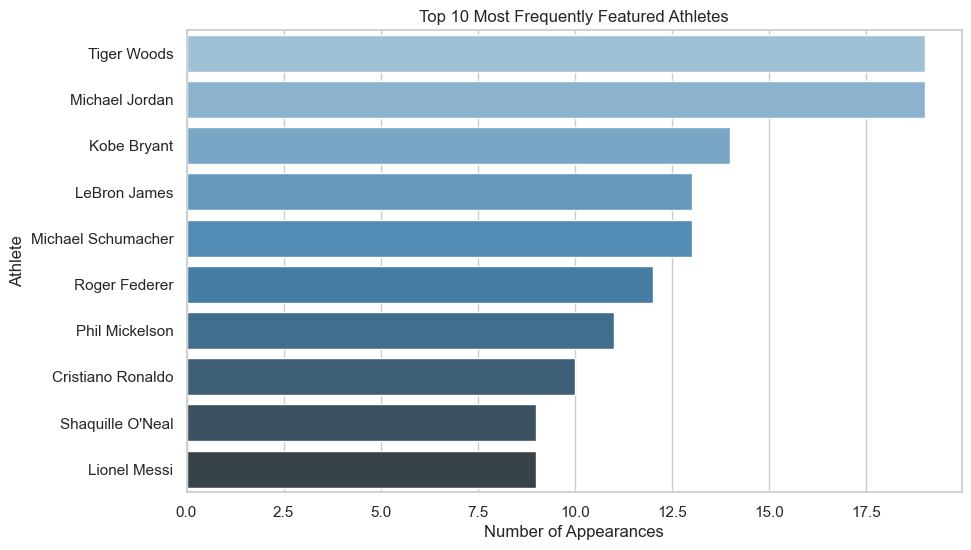

In [54]:
# Top 10 most frequent athletes
top_athletes = df['name'].value_counts().head(10)
sns.barplot(y=top_athletes.index, x=top_athletes.values, palette='Blues_d')
plt.title("Top 10 Most Frequently Featured Athletes")
plt.xlabel("Number of Appearances")
plt.ylabel("Athlete")
plt.show()


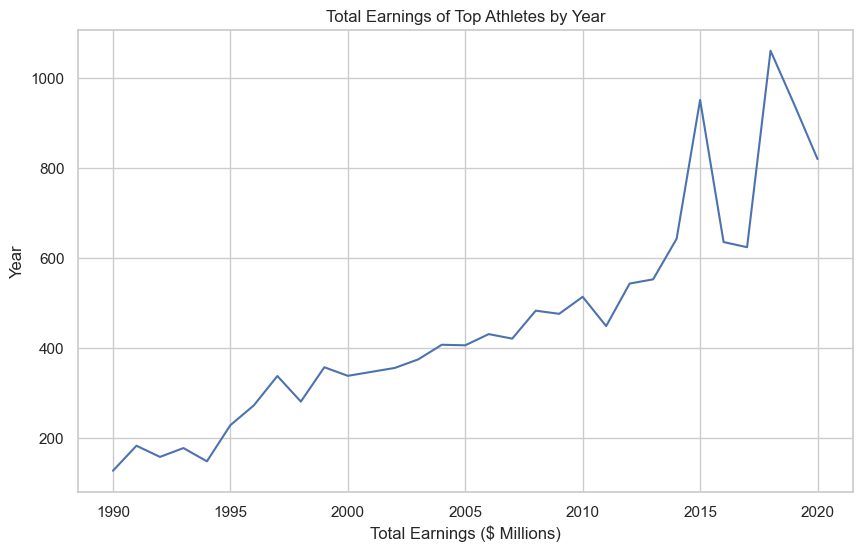

In [55]:
# Total earnings per year
yearly_earnings = df.groupby('year')['earnings_($_million)'].sum().reset_index()
sns.lineplot(data=yearly_earnings, x='year', y='earnings_($_million)', markers='o')
plt.title("Total Earnings of Top Athletes by Year")
plt.xlabel("Total Earnings ($ Millions)")
plt.ylabel("Year")
plt.show()

/var/folders/ty/cm6k447j44s8g5dkbd81qj0m0000gn/T/ipykernel_2576/455334404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette='rocket')


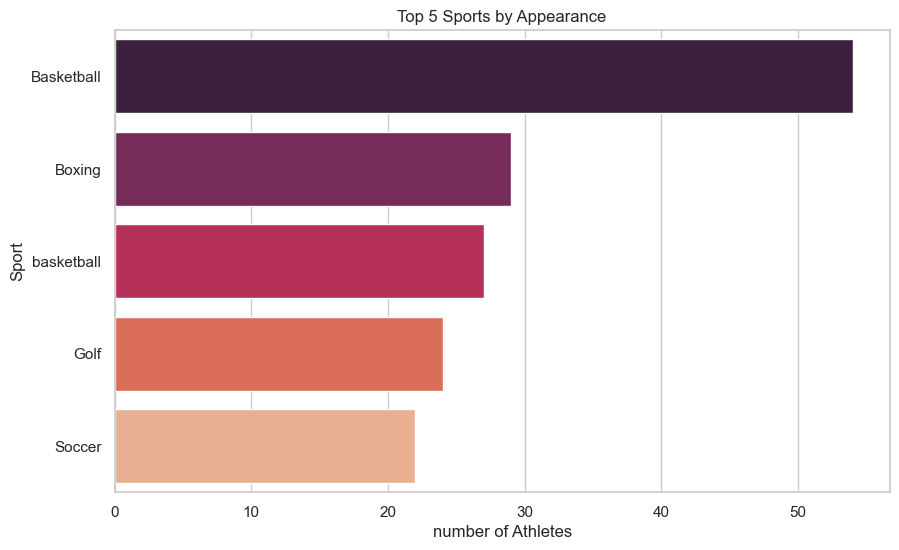

In [56]:
# Top 5 Sports by Appearance
top_sports = df['sport'].value_counts().head(5)
sns.barplot(x=top_sports.values, y=top_sports.index, palette='rocket')
plt.title("Top 5 Sports by Appearance")
plt.xlabel("number of Athletes")
plt.ylabel("Sport")
plt.show()

/var/folders/ty/cm6k447j44s8g5dkbd81qj0m0000gn/T/ipykernel_2576/2078085056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_earnings_sport.values, y=avg_earnings_sport.index, palette='viridis')


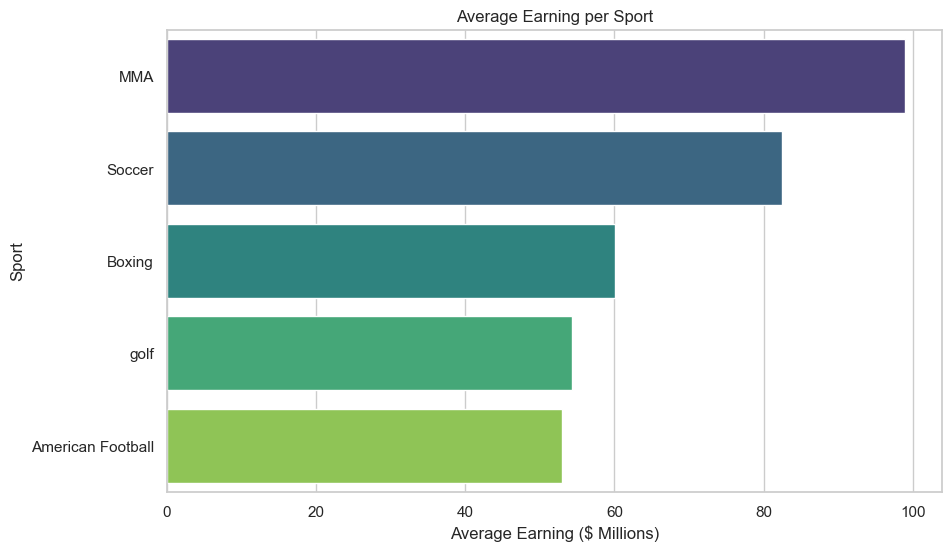

In [57]:
# Average Earnings per Sport
avg_earnings_sport = df.groupby('sport')['earnings_($_million)'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=avg_earnings_sport.values, y=avg_earnings_sport.index, palette='viridis')
plt.title("Average Earning per Sport")
plt.xlabel("Average Earning ($ Millions)")
plt.ylabel("Sport")
plt.show()

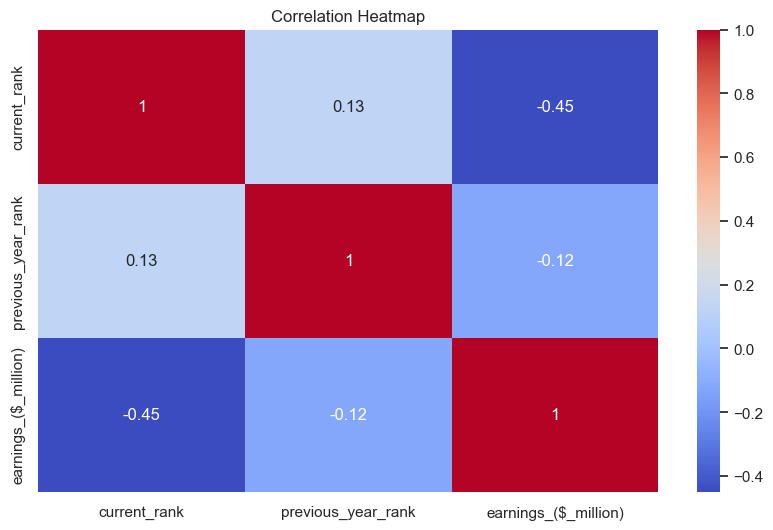

In [ ]:
# Create a heatmap of numeric correlation
corr = df[['current_rank', 'previous_year_rank', 'earnings_($_million)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

"""To determine if an athlete's rank is purely financial or influenced by other factors"""

Key insights

- Boxing and auto racing were dominant in early 1990s.
- Athlete earnings increaed significantly post 2000.
- Few athletes appear repeatedly - strong brand and endorsement influnce.
- Earnings data is skewed heavily by top individuals in sports like boxing, golf, and tennis.

📄 **EDA (Full Document)**
[Click here to view/download the PDF](./EDA%20Task%20Doc%20copy.docx.pdf)
